In [1]:
#Import code from last time
%run k1-2.ipynb

         Current function value: 0.178413
         Iterations: 100
         Function evaluations: 115
         Gradient evaluations: 115


<Figure size 640x480 with 1 Axes>

Optimization terminated successfully.
         Current function value: 0.105920
         Iterations: 27
         Function evaluations: 28
         Gradient evaluations: 28


<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

In [2]:
testX

array([[0.48171501],
       [0.44281211],
       [0.49627058],
       [0.47546339],
       [0.55155979],
       [0.50099435],
       [0.44545859],
       [0.50571167],
       [0.46588904],
       [0.46785659],
       [0.45300142],
       [0.43741172],
       [0.3506737 ]])

In [3]:
testY

array([[0.44281211],
       [0.49627058],
       [0.47546339],
       [0.55155979],
       [0.50099435],
       [0.44545859],
       [0.50571167],
       [0.46588904],
       [0.46785659],
       [0.45300142],
       [0.43741172],
       [0.3506737 ],
       [0.36403131]])

In [4]:
trainX

array([[0.        ],
       [0.051925  ],
       [0.14831904],
       [0.11211342],
       [0.17073406],
       [0.2232566 ],
       [0.24197469],
       [0.36573346],
       [0.55255899],
       [0.37002352],
       [0.3325317 ],
       [0.38788752],
       [0.39836394],
       [0.2848263 ],
       [0.18673502],
       [0.18269477],
       [0.255617  ],
       [0.23597043],
       [0.16413413],
       [0.17817663],
       [0.1639561 ],
       [0.13324148],
       [0.22639902],
       [0.25501386],
       [0.23708614],
       [0.23165112],
       [0.23306761],
       [0.22117372],
       [0.22633168],
       [0.21869864],
       [0.2320322 ],
       [0.23194795],
       [0.22154782],
       [0.28795858],
       [0.28837327],
       [0.29714576],
       [0.24366982],
       [0.30743731],
       [0.35859786],
       [0.37218122],
       [0.45025948],
       [0.44309563],
       [0.55815598],
       [0.60235983],
       [0.69629172],
       [0.79060467],
       [0.64402223],
       [0.583

In [5]:
trainY

array([[0.051925  ],
       [0.14831904],
       [0.11211342],
       [0.17073406],
       [0.2232566 ],
       [0.24197469],
       [0.36573346],
       [0.55255899],
       [0.37002352],
       [0.3325317 ],
       [0.38788752],
       [0.39836394],
       [0.2848263 ],
       [0.18673502],
       [0.18269477],
       [0.255617  ],
       [0.23597043],
       [0.16413413],
       [0.17817663],
       [0.1639561 ],
       [0.13324148],
       [0.22639902],
       [0.25501386],
       [0.23708614],
       [0.23165112],
       [0.23306761],
       [0.22117372],
       [0.22633168],
       [0.21869864],
       [0.2320322 ],
       [0.23194795],
       [0.22154782],
       [0.28795858],
       [0.28837327],
       [0.29714576],
       [0.24366982],
       [0.30743731],
       [0.35859786],
       [0.37218122],
       [0.45025948],
       [0.44309563],
       [0.55815598],
       [0.60235983],
       [0.69629172],
       [0.79060467],
       [0.64402223],
       [0.58322864],
       [0.481

In [6]:
#Regularization Parameter:
Lambda = 0.0001

In [7]:
#Need to make changes to costFunction and costFunctionPrim:
def costFunction(self, X, y):
    #Compute cost for given X,y, use weights already stored in class.
    self.yHat = self.forward(X)
    #We don't want cost to increase with the number of examples, so normalize by dividing the error term by number of examples(X.shape[0])
    J = 0.5*sum((y-self.yHat)**2)/X.shape[0] + (self.Lambda/2)*(sum(self.W1**2)+sum(self.W2**2))
    return J

def costFunctionPrime(self, X, y):
    #Compute derivative with respect to W and W2 for a given X and y:
    self.yHat = self.forward(X)

    delta3 = np.multiply(-(y-self.yHat), self.sigmoidPrime(self.z3))
    #Add gradient of regularization term:
    dJdW2 = np.dot(self.a2.T, delta3)/X.shape[0] + self.Lambda*self.W2

    delta2 = np.dot(delta3, self.W2.T)*self.sigmoidPrime(self.z2)
    #Add gradient of regularization term:
    dJdW1 = np.dot(X.T, delta2)/X.shape[0] + self.Lambda*self.W1

    return dJdW1, dJdW2

In [8]:
#New complete class, with changes:
class Neural_Network(object):
    def __init__(self, Lambda=0.0001):        
        #Define Hyperparameters
        self.inputLayerSize = 1
        self.outputLayerSize = 1
        self.hiddenLayerSize = 2
        
        #Weights (parameters)
        self.W1 = np.random.randn(self.inputLayerSize,self.hiddenLayerSize)
        self.W2 = np.random.randn(self.hiddenLayerSize,self.outputLayerSize)
        
        #Regularization Parameter:
        self.Lambda = Lambda
        
    def forward(self, X):
        #Propogate inputs though network
        self.z2 = np.dot(X, self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        yHat = self.sigmoid(self.z3) 
        return yHat
        
    def sigmoid(self, z):
        #Apply sigmoid activation function to scalar, vector, or matrix
        return 1/(1+np.exp(-z))
    
    def sigmoidPrime(self,z):
        #Gradient of sigmoid
        return np.exp(-z)/((1+np.exp(-z))**2)
    
    def costFunction(self, X, y):
        #Compute cost for given X,y, use weights already stored in class.
        self.yHat = self.forward(X)
        J = 0.5*sum((y-self.yHat)**2)/X.shape[0] + (self.Lambda/2)*(np.sum(self.W1**2)+np.sum(self.W2**2))
        return J
        
    def costFunctionPrime(self, X, y):
        #Compute derivative with respect to W and W2 for a given X and y:
        self.yHat = self.forward(X)
        
        delta3 = np.multiply(-(y-self.yHat), self.sigmoidPrime(self.z3))
        #Add gradient of regularization term:
        dJdW2 = np.dot(self.a2.T, delta3)/X.shape[0] + self.Lambda*self.W2
        
        delta2 = np.dot(delta3, self.W2.T)*self.sigmoidPrime(self.z2)
        #Add gradient of regularization term:
        dJdW1 = np.dot(X.T, delta2)/X.shape[0] + self.Lambda*self.W1
        
        return dJdW1, dJdW2
    
    def predict(self):
        prediksi = self.forward(dataprediksi)
        return prediksi
    
    #Helper functions for interacting with other methods/classes
    def getParams(self):
        #Get W1 and W2 Rolled into vector:
        params = np.concatenate((self.W1.ravel(), self.W2.ravel()))
        return params
    
    def setParams(self, params):
        #Set W1 and W2 using single parameter vector:
        W1_start = 0
        W1_end = self.hiddenLayerSize*self.inputLayerSize
        self.W1 = np.reshape(params[W1_start:W1_end], \
                             (self.inputLayerSize, self.hiddenLayerSize))
        W2_end = W1_end + self.hiddenLayerSize*self.outputLayerSize
        self.W2 = np.reshape(params[W1_end:W2_end], \
                             (self.hiddenLayerSize, self.outputLayerSize))
        
    def computeGradients(self, X, y):
        dJdW1, dJdW2 = self.costFunctionPrime(X, y)
        return np.concatenate((dJdW1.ravel(), dJdW2.ravel()))

In [9]:
def computeNumericalGradient(N, X, y):
    paramsInitial = N.getParams()
    numgrad = np.zeros(paramsInitial.shape)
    perturb = np.zeros(paramsInitial.shape)
    e = 1e-4

    for p in range(len(paramsInitial)):
        #Set perturbation vector
        perturb[p] = e
        N.setParams(paramsInitial + perturb)
        loss2 = N.costFunction(X, y)
            
        N.setParams(paramsInitial - perturb)
        loss1 = N.costFunction(X, y)

        #Compute Numerical Gradient
        numgrad[p] = (loss2 - loss1) / (2*e)

            #Return the value we changed to zero:
        perturb[p] = 0
            
    #Return Params to original value:
    N.setParams(paramsInitial)

    return numgrad 

In [10]:
NN = Neural_Network(Lambda=0.0001)

In [11]:
#Make sure our gradients our correct after making changes:
numgrad = computeNumericalGradient(NN, X, y)
grad = NN.computeGradients(X,y)

In [12]:
#Should be less than 1e-8:
np.linalg.norm(grad-numgrad)/np.linalg.norm(grad+numgrad)

5.331737056841238e-10

In [13]:
T = trainer(NN)

In [14]:
T.train(X,y,testX,testY)

Optimization terminated successfully.
         Current function value: 0.004326
         Iterations: 55
         Function evaluations: 57
         Gradient evaluations: 57


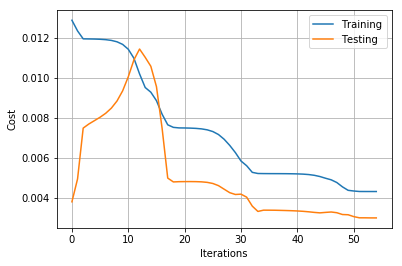

In [15]:
plot.plot(T.J)
plot.plot(T.testJ)
plot.grid(1)
plot.xlabel('Iterations')
plot.ylabel('Cost')
plot.legend(['Training', 'Testing'])
plot.show()

In [16]:
T.J

[array([0.01287976]),
 array([0.01234647]),
 array([0.01195025]),
 array([0.01194568]),
 array([0.01193987]),
 array([0.01192934]),
 array([0.01190968]),
 array([0.01187271]),
 array([0.01180322]),
 array([0.01167326]),
 array([0.01143105]),
 array([0.01098121]),
 array([0.01019979]),
 array([0.00952057]),
 array([0.00928625]),
 array([0.00886285]),
 array([0.00818741]),
 array([0.00765794]),
 array([0.00752985]),
 array([0.00750279]),
 array([0.00749912]),
 array([0.00749219]),
 array([0.00747897]),
 array([0.00745386]),
 array([0.0074068]),
 array([0.00732103]),
 array([0.00717253]),
 array([0.00693773]),
 array([0.00662928]),
 array([0.00626961]),
 array([0.00584876]),
 array([0.00561375]),
 array([0.00528317]),
 array([0.00522579]),
 array([0.00522131]),
 array([0.0052192]),
 array([0.00521838]),
 array([0.00521737]),
 array([0.00521556]),
 array([0.0052122]),
 array([0.00520592]),
 array([0.00519429]),
 array([0.00517306]),
 array([0.00513564]),
 array([0.00507417]),
 array([0.004

In [17]:
T.testJ

[array([0.00381181]),
 array([0.00495467]),
 array([0.00749326]),
 array([0.0076971]),
 array([0.00786604]),
 array([0.00803652]),
 array([0.00823452]),
 array([0.00849129]),
 array([0.00884718]),
 array([0.00935394]),
 array([0.01005687]),
 array([0.01089883]),
 array([0.01144151]),
 array([0.01102824]),
 array([0.0105805]),
 array([0.00956087]),
 array([0.00748582]),
 array([0.00499565]),
 array([0.0048047]),
 array([0.00481725]),
 array([0.00482076]),
 array([0.00482173]),
 array([0.00481884]),
 array([0.00480843]),
 array([0.00478278]),
 array([0.00472736]),
 array([0.00461944]),
 array([0.00444295]),
 array([0.00426778]),
 array([0.00417758]),
 array([0.00419366]),
 array([0.00404317]),
 array([0.003596]),
 array([0.00333065]),
 array([0.00339453]),
 array([0.00339324]),
 array([0.00339075]),
 array([0.00338369]),
 array([0.00337609]),
 array([0.00336684]),
 array([0.00335441]),
 array([0.0033369]),
 array([0.00331266]),
 array([0.00328287]),
 array([0.00325997]),
 array([0.003283

In [18]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(T.J, T.testJ)

0.0023057923261122493

In [19]:
yHat=NN.forward(X)

In [20]:
yHat

array([[0.12284668],
       [0.14877527],
       [0.20745177],
       [0.18387165],
       [0.22289049],
       [0.26120467],
       [0.2754517 ],
       [0.37318733],
       [0.50978828],
       [0.37658043],
       [0.34679438],
       [0.39064102],
       [0.39882467],
       [0.3088764 ],
       [0.23426744],
       [0.2313683 ],
       [0.28598718],
       [0.27085351],
       [0.21828212],
       [0.22814713],
       [0.21815851],
       [0.19741976],
       [0.26357788],
       [0.28551901],
       [0.27170603],
       [0.26756166],
       [0.26863969],
       [0.25963605],
       [0.26352694],
       [0.25777675],
       [0.26785154],
       [0.26778744],
       [0.25991753],
       [0.3113517 ],
       [0.31167965],
       [0.31862886],
       [0.27675434],
       [0.32680478],
       [0.36753233],
       [0.37828484],
       [0.43841629],
       [0.43306127],
       [0.51338329],
       [0.54054488],
       [0.59091532],
       [0.63191466],
       [0.56411395],
       [0.529

In [21]:
y

array([[0.051925  ],
       [0.14831904],
       [0.11211342],
       [0.17073406],
       [0.2232566 ],
       [0.24197469],
       [0.36573346],
       [0.55255899],
       [0.37002352],
       [0.3325317 ],
       [0.38788752],
       [0.39836394],
       [0.2848263 ],
       [0.18673502],
       [0.18269477],
       [0.255617  ],
       [0.23597043],
       [0.16413413],
       [0.17817663],
       [0.1639561 ],
       [0.13324148],
       [0.22639902],
       [0.25501386],
       [0.23708614],
       [0.23165112],
       [0.23306761],
       [0.22117372],
       [0.22633168],
       [0.21869864],
       [0.2320322 ],
       [0.23194795],
       [0.22154782],
       [0.28795858],
       [0.28837327],
       [0.29714576],
       [0.24366982],
       [0.30743731],
       [0.35859786],
       [0.37218122],
       [0.45025948],
       [0.44309563],
       [0.55815598],
       [0.60235983],
       [0.69629172],
       [0.79060467],
       [0.64402223],
       [0.58322864],
       [0.481

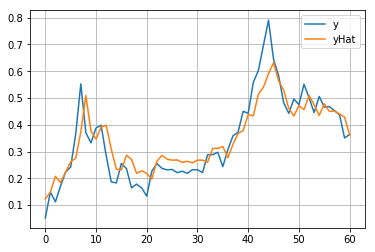

In [22]:
#Plot cost during training:
plot.plot(y)
plot.plot(yHat)
plot.grid(1)
plot.legend(['y', 'yHat'])
plot.show()

In [23]:
prediksi=NN.forward(dataprediksi)

In [24]:
prediksi

array([[0.37183959],
       [0.6337561 ],
       [0.69517191],
       [0.59635662]])

In [25]:
from sklearn.metrics import mean_squared_error 

In [26]:
Y_true= ([	0.795380412	]	,
[	1	]	,
[	0.707681705	]	,
[	0.491695324	]	,

)


Y_pred=prediksi
mean_squared_error(Y_true,Y_pred) 

0.08115797639437604

In [27]:
dataprediksi

array([[0.36403131],
       [0.79538041],
       [1.        ],
       [0.70768171]])

In [28]:
a=np.array([	0.491695324	]	)

In [29]:
#prediksi 1
prediksi=NN.forward(a)
prediksi

array([0.46854564])

In [30]:
#prediksi 2
c=prediksi
b=a[1:]
d=np.concatenate((b,c))
prediksi=NN.forward(d)
prediksi

array([0.45189783])

In [31]:
#prediksi 3
c=prediksi
b=d[1:]
e=np.concatenate((b,c))
prediksi=NN.forward(e)
prediksi

array([0.43963534])

In [32]:
#prediksi 4
c=prediksi
b=e[1:]
f=np.concatenate((b,c))
prediksi=NN.forward(f)
prediksi

array([0.4304607])

In [33]:
#prediksi 5
c=prediksi
b=f[1:]
g=np.concatenate((b,c))
prediksi=NN.forward(g)
prediksi

array([0.42352332])

In [34]:
#prediksi 6
c=prediksi
b=g[1:]
h=np.concatenate((b,c))
prediksi=NN.forward(h)
prediksi

array([0.41823887])

In [35]:
#prediksi 7
c=prediksi
b=g[1:]
i=np.concatenate((b,c))
prediksi=NN.forward(i)
prediksi

array([0.41419234])

In [36]:
#prediksi 8
c=prediksi
b=g[1:]
j=np.concatenate((b,c))
prediksi=NN.forward(j)
prediksi

array([0.41108193])

In [37]:
#prediksi 9
c=prediksi
b=g[1:]
k=np.concatenate((b,c))
prediksi=NN.forward(k)
prediksi

array([0.4086844])

In [38]:
#prediksi 10
c=prediksi
b=g[1:]
l=np.concatenate((b,c))
prediksi=NN.forward(l)
prediksi

array([0.40683251])

In [39]:
#prediksi 11
c=prediksi
b=g[1:]
m=np.concatenate((b,c))
prediksi=NN.forward(m)
prediksi

array([0.40539984])

In [40]:
#prediksi 12
c=prediksi
b=g[1:]
n=np.concatenate((b,c))
prediksi=NN.forward(n)
prediksi

array([0.40429019])